In [683]:

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import warnings
import pickle

# warnings.filterwarnings("ignore") 
df = pd.read_csv('Ethereum Historical Data.csv', delimiter=',')
df = df.dropna()
df.sort_index()


,Date,Close,Open,High,Low,Volume,Change %
0,"May 06, 2023","1,969.82","1,993.33","2,013.10","1,964.43",641.57K,-1.18%
1,"May 05, 2023","1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%
2,"May 04, 2023","1,877.06","1,904.76","1,915.15","1,868.18",372.69K,-1.45%
3,"May 03, 2023","1,904.74","1,869.74","1,915.00","1,844.72",489.66K,1.87%
4,"May 02, 2023","1,869.74","1,830.75","1,878.70","1,823.25",391.27K,2.13%
...,...,...,...,...,...,...,...
2609,"Mar 14, 2016",12.5,15.07,15.07,11.4,92.18K,-17.05%
2610,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
2611,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
2612,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%


In [684]:
df['Close'] = df['Close'].str.replace(
    ",", "", regex = False
).astype(float)
df['Open'] = df['Open'].str.replace(
    ",", "", regex = False
).astype(float)
df['High'] = df['High'].str.replace(
    ",", "", regex = False
).astype(float)
df['Low'] = df['Low'].str.replace(
    ",", "", regex = False
).astype(float)
df['Volume'] = df['Volume'].str.replace('K', '', regex = False).str.replace('M', '', regex = False).str.replace('B', '', regex = False).str.replace('-', '0', regex = False).astype(float)

df.describe()

,Close,Open,High,Low,Volume
count,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000
mean,913.755325,913.025754,943.405650,878.913963,221.761901
std,1112.980330,1112.942996,1147.197002,1073.339814,298.623690
min,6.700000,6.680000,7.320000,5.860000,0.000000
25%,155.015000,154.945000,162.102500,148.607500,5.127500
50%,327.290000,325.750000,339.080000,312.145000,19.975000
75%,1534.397500,1532.655000,1580.915000,1485.977500,453.582500
max,4808.380000,4808.340000,4864.060000,4715.430000,996.710000


In [685]:
# df['open-close']  = df['Open'] - df['Close']
# df['low-high']  = df['Low'] - df['High']
df['normal-volume'] = (df['Volume'] -  df['Volume'].min()) / (df['Volume'].max()  - df['Volume'].min())
df['normal-high'] = (df['High'] -  df['High'].min()) / (df['High'].max()  - df['High'].min())
df['normal-low'] = (df['Low'] -  df['Low'].min()) / (df['Low'].max()  - df['Low'].min())
df['normal-open'] = (df['Open'] -  df['Open'].min()) / (df['Open'].max()  - df['Open'].min())
df['normal-close'] = (df['Close'] -  df['Close'].min()) / (df['Close'].max()  - df['Close'].min())

df['open-close']  = df['normal-open'] - df['normal-close']
df['low-high']  = df['normal-low'] - df['normal-high']

df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) # in origin
# df['target'] = np.where(df['Close'].shift(1) > df['Close'], 1, 0)

featureColumns = ['open-close', 'low-high']

features = df[featureColumns]
target = df['target']

In [686]:
df.head()

,Date,Close,Open,High,Low,Volume,Change %,normal-volume,normal-high,normal-low,normal-open,normal-close,open-close,low-high,target
0,"May 06, 2023",1969.82,1993.33,2013.10,1964.43,641.57,-1.18%,0.643688,0.412989,0.415870,0.413742,0.408840,0.004902,0.002881,1
1,"May 05, 2023",1993.33,1877.06,1996.64,1875.66,589.05,6.19%,0.590994,0.409600,0.397021,0.389528,0.413736,-0.024209,-0.012578,0
2,"May 04, 2023",1877.06,1904.76,1915.15,1868.18,372.69,-1.45%,0.373920,0.392821,0.395433,0.395297,0.389522,0.005775,0.002612,1
3,"May 03, 2023",1904.74,1869.74,1915.00,1844.72,489.66,1.87%,0.491276,0.392790,0.390452,0.388003,0.395287,-0.007283,-0.002338,0
4,"May 02, 2023",1869.74,1830.75,1878.70,1823.25,391.27,2.13%,0.392562,0.385316,0.385893,0.379883,0.387998,-0.008114,0.000577,0


In [687]:


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=34)
# X_train=features[0:100]
# X_test=features[101:]
# y_train=target[0:100]
# y_test=target[101:]

model = XGBClassifier(n_estimators=1, learning_rate=0.3, max_depth=4443, random_state=45)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy xboost: {accuracy:.4f}")

Accuracy xboost: 0.9885


In [688]:

filename = 'boost_classifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [689]:
df.shape

(2614, 15)

In [ ]:


dlrsAmount = 1000
dlrsInput = dlrsAmount
cryptoAmount = 0
closePrice = 0
list = []
predictedCheck = []
investedPart = 0.5 * dlrsAmount

summList = []

wrongPredictionsAmount = 0
truePredictionsAmount = 0

openPrice = 0
summ = 0
for index, row in df[-730:-700].iterrows():
    pr = model.predict([row[featureColumns]])
    predicted = pr[:][0]
    # print(predicted)
    closePrice = row['Close']
    
    if predicted == 1 and row['Close'] > df.iloc[index - 1]['Close']:
        truePredictionsAmount = truePredictionsAmount + 1
    elif predicted == 1 and row['Close'] < df.iloc[index - 1]['Close']:
        wrongPredictionsAmount = wrongPredictionsAmount + 1

    if predicted == 0 and row['Close'] < df.iloc[index - 1]['Close']:
        truePredictionsAmount = truePredictionsAmount + 1
    elif predicted == 0 and row['Close'] > df.iloc[index - 1]['Close']:
        wrongPredictionsAmount = wrongPredictionsAmount + 1

    if(predicted == 1):
        if openPrice == 0:
            openPrice = row['Close']

        if dlrsAmount and cryptoAmount == 0:
            list.append(dlrsAmount)
            cryptoAmount = cryptoAmount + investedPart / closePrice
            dlrsAmount = dlrsAmount - investedPart
    else:

        if openPrice > 0:
            summ = summ + (row['Close'] - openPrice)
            summList.append(row['Close'] - openPrice)
            openPrice = 0


        if cryptoAmount:
            dlrsAmount = dlrsAmount + cryptoAmount * closePrice
            cryptoAmount = 0
  
  
    
df = pd.DataFrame(list)
summListDf = pd.DataFrame(summList)

# df.describe()
# df.tail(2)

print('summ', summ)
print('WRONG', wrongPredictionsAmount)
print('true', truePredictionsAmount)
print('percent', truePredictionsAmount/(wrongPredictionsAmount + truePredictionsAmount))

summ 3457.549999999998
WRONG 187
true 177
percent 0.48626373626373626


dlrsAmount 5272.652008543115
dlrsInput 1000
cryptoAmount 0
cryptoAmount * dlrsAmount 0.0


<Axes: >

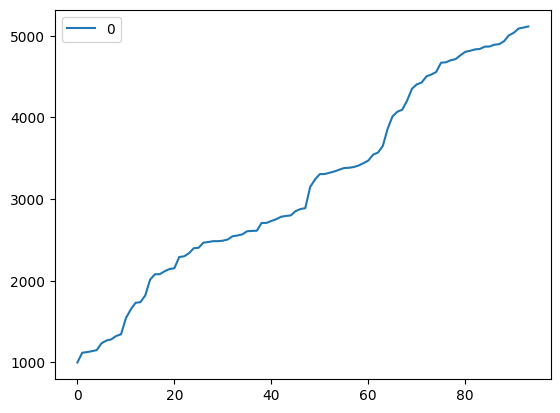

In [691]:
print('dlrsAmount', dlrsAmount)
print('dlrsInput', dlrsInput)
print('cryptoAmount', cryptoAmount)
print('cryptoAmount * dlrsAmount', cryptoAmount * closePrice)
df.plot()

<Axes: >

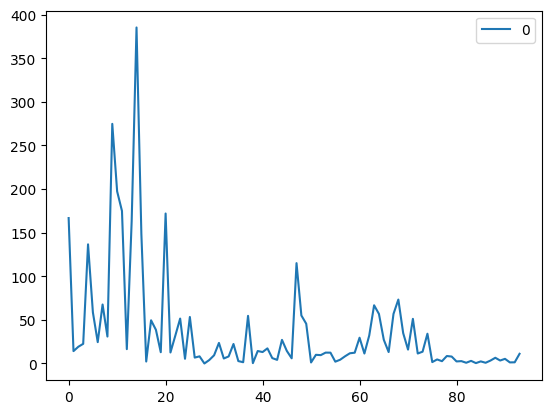

In [692]:
summListDf.plot()

In [693]:
df = pd.DataFrame([[1,"Gregory"],[2,"Elvis"],[3,'Jakomo'],[4,'Ingvar']], index=["A", "B","C","D"], columns=[['Number','Name']])
# df['name'].shift(1)
# df['target'] = np.where(df['Close'].shift(1) > df['Close'], 1, 0)
df['result'] = np.where(df['Name'].shift(-1) == 'Jakomo', '123', '234')
df.head()

,Number,Name,result
A,1,Gregory,234
B,2,Elvis,123
C,3,Jakomo,234
D,4,Ingvar,234
